In [15]:
!python3 ./generate_random_strings.py 10000000

10000000 random 16bytes strings are being generated ...
0.0 %
10.0 %
20.0 %
30.0 %
40.0 %
50.0 %
60.0 %
70.0 %
80.0 %
90.0 %
100 %
== Done generating random strings ==


In [16]:
# !python3 ./data_preprocessing.py 10000

# !nvcc -G ./gpu_bloom/gpu_bloom.cu -o ./gpu_bloom/gpu_bloom.out

# !./gpu_bloom/gpu_bloom.out 1

In [17]:
import subprocess
import time
import matplotlib.pyplot as plt

hash_functions = {'xxhash32': '1', 'djb2': '2', 'jenkins': '3', 'aphash': '4', 'sha1': '5', 'md5': '6', 'murmur': '6'}

cpu_time = []
gpu_time = []

run = ["nvcc", "-G", "./gpu_bloom/gpu_bloom_v2.cu", "-o", "./gpu_bloom/gpu_bloom.out"]
output = subprocess.run(run)
print(output)

start_n = 0
stop_n = 10000000
step_n = 1000000

x = []
for n_words in range(start_n, stop_n, step_n):
  x.append(n_words)

  run = ["python3", "./data_preprocessing.py", str(n_words)]
  output = subprocess.run(run)
  print(output)

  start = time.time()
  run = ["./gpu_bloom/gpu_bloom.out", hash_functions['xxhash32']]
  output = subprocess.run(run)
  print(output)
  end = time.time()

  # print(f'GPU: {end - start} s')
  gpu_time.append(end - start)

  # !gcc ./cpu_bloom/cpu_bloom.c ./cpu_bloom/xxhash64-ref.c -o ./cpu_bloom/cpu_bloom.out
  run = ["gcc", "./cpu_bloom/cpu_bloom.c", "./cpu_bloom/xxhash64-ref.c", "-o", "./cpu_bloom/cpu_bloom.out"]
  output = subprocess.run(run)
  print(output)

  run = ["./cpu_bloom/cpu_bloom.out", str(n_words), str(n_words)]
  start = time.time()
  output = subprocess.run(run)
  print(output)
  end = time.time()

  # print(f'CPU: {end - start} s')
  cpu_time.append((end - start))

  progress = ((n_words / step_n) * 100) / ((stop_n - start_n) / step_n)
  print(f'{progress} %')

print('Done!')
# print(f'cpu_time: {cpu_time}')
# print(f'gpu_time: {gpu_time}')

CompletedProcess(args=['nvcc', '-G', './gpu_bloom/gpu_bloom_v2.cu', '-o', './gpu_bloom/gpu_bloom.out'], returncode=1)
CompletedProcess(args=['python3', './data_preprocessing.py', '0'], returncode=0)
CompletedProcess(args=['./gpu_bloom/gpu_bloom.out', '1'], returncode=0)
CompletedProcess(args=['gcc', './cpu_bloom/cpu_bloom.c', './cpu_bloom/xxhash64-ref.c', '-o', './cpu_bloom/cpu_bloom.out'], returncode=0)
CompletedProcess(args=['./cpu_bloom/cpu_bloom.out', '0', '0'], returncode=0)
0.0 %
CompletedProcess(args=['python3', './data_preprocessing.py', '1000000'], returncode=0)
CompletedProcess(args=['./gpu_bloom/gpu_bloom.out', '1'], returncode=0)
CompletedProcess(args=['gcc', './cpu_bloom/cpu_bloom.c', './cpu_bloom/xxhash64-ref.c', '-o', './cpu_bloom/cpu_bloom.out'], returncode=0)
CompletedProcess(args=['./cpu_bloom/cpu_bloom.out', '1000000', '1000000'], returncode=0)
10.0 %
CompletedProcess(args=['python3', './data_preprocessing.py', '2000000'], returncode=0)
CompletedProcess(args=['./gpu_

Done


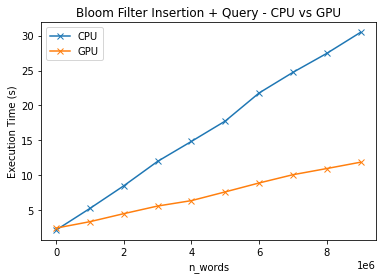

In [18]:
title = f'Bloom Filter Insertion + Query - CPU vs GPU'

plt.title(title)

plt.xlabel("n_words")
plt.ylabel("Execution Time (s)")

plt.plot(x, cpu_time, 'x-', label='CPU')
plt.plot(x, gpu_time, 'x-', label='GPU')

plt.legend()

plt.savefig("graph_cpu_vs_gpu.png",dpi=1200)

print('Done')

In [19]:
import subprocess
import time
import matplotlib.pyplot as plt

hash_functions = {'xxhash32': '1', 'djb2': '2', 'jenkins': '3', 'aphash': '4', 'sha1': '5', 'md5': '6', 'murmur': '6'}

xxhash64_time = []
djb2_time = []
jenkins_time = []
aphash_time = []
sha1_time = []
md5_time = []
murmur_time = []

run = ["nvcc", "-G", "./gpu_bloom/gpu_bloom_v2.cu", "-o", "./gpu_bloom/gpu_bloom.out"]
output = subprocess.run(run)
print(output)
# !nvcc -G ./gpu_bloom/gpu_bloom_v2.cu -o ./gpu_bloom/gpu_bloom.out

start_n = 0
stop_n = 10000000
step_n = 1000000

x = []
for n_words in range(start_n, stop_n, step_n):
  x.append(n_words)

  run = ["python3", "./data_preprocessing.py", str(n_words)]
  output = subprocess.run(run)
  print(output)

  start = time.time()
  run = ["./gpu_bloom/gpu_bloom.out", hash_functions['xxhash32']]
  output = subprocess.run(run)
  print(output)
  end = time.time()

  xxhash64_time.append(end - start)

  start = time.time()
  run = ["./gpu_bloom/gpu_bloom.out", hash_functions['djb2']]
  output = subprocess.run(run)
  print(output)
  end = time.time()

  djb2_time.append(end - start)

  start = time.time()
  run = ["./gpu_bloom/gpu_bloom.out", hash_functions['jenkins']]
  output = subprocess.run(run)
  print(output)
  end = time.time()

  jenkins_time.append(end - start)

  start = time.time()
  run = ["./gpu_bloom/gpu_bloom.out", hash_functions['aphash']]
  output = subprocess.run(run)
  print(output)
  end = time.time()

  aphash_time.append(end - start)

  start = time.time()
  run = ["./gpu_bloom/gpu_bloom.out", hash_functions['sha1']]
  output = subprocess.run(run)
  print(output)
  end = time.time()

  sha1_time.append(end - start)

  start = time.time()
  run = ["./gpu_bloom/gpu_bloom.out", hash_functions['md5']]
  output = subprocess.run(run)
  print(output)
  end = time.time()

  md5_time.append(end - start)

  start = time.time()
  run = ["./gpu_bloom/gpu_bloom.out", hash_functions['md5']]
  output = subprocess.run(run)
  print(output)
  end = time.time()

  murmur_time.append(end - start)

  progress = ((n_words / step_n) * 100) / ((stop_n - start_n) / step_n)
  print(f'{progress} %')

print('Done!')
# print(f'cpu_time: {cpu_time}')
# print(f'gpu_time: {gpu_time}')

CompletedProcess(args=['nvcc', '-G', './gpu_bloom/gpu_bloom_v2.cu', '-o', './gpu_bloom/gpu_bloom.out'], returncode=1)
CompletedProcess(args=['python3', './data_preprocessing.py', '0'], returncode=0)
CompletedProcess(args=['./gpu_bloom/gpu_bloom.out', '1'], returncode=0)
CompletedProcess(args=['./gpu_bloom/gpu_bloom.out', '2'], returncode=0)
CompletedProcess(args=['./gpu_bloom/gpu_bloom.out', '3'], returncode=0)
CompletedProcess(args=['./gpu_bloom/gpu_bloom.out', '4'], returncode=0)
CompletedProcess(args=['./gpu_bloom/gpu_bloom.out', '5'], returncode=0)
CompletedProcess(args=['./gpu_bloom/gpu_bloom.out', '6'], returncode=0)
0.0 %
CompletedProcess(args=['python3', './data_preprocessing.py', '1000000'], returncode=0)
CompletedProcess(args=['./gpu_bloom/gpu_bloom.out', '1'], returncode=0)
CompletedProcess(args=['./gpu_bloom/gpu_bloom.out', '2'], returncode=0)
CompletedProcess(args=['./gpu_bloom/gpu_bloom.out', '3'], returncode=0)
CompletedProcess(args=['./gpu_bloom/gpu_bloom.out', '4'], re

Done


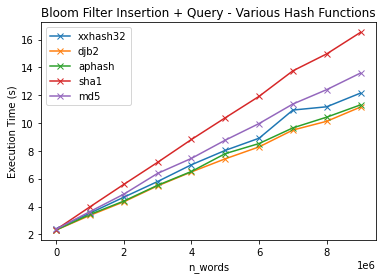

In [20]:
title = f'Bloom Filter Insertion + Query - Various Hash Functions'

plt.title(title)

plt.xlabel("n_words")
plt.ylabel("Execution Time (s)")

plt.plot(x, xxhash64_time, 'x-', label='xxhash32')
plt.plot(x, djb2_time, 'x-', label='djb2')
plt.plot(x, aphash_time, 'x-', label='aphash')
plt.plot(x, sha1_time, 'x-', label='sha1')
plt.plot(x, md5_time, 'x-', label='md5')
plt.plot(x, ,murmur_time, 'x-', label='murmur')

plt.legend()

plt.savefig("graph_various_hashes.png",dpi=1200)

print('Done')

In [28]:
import subprocess
import time
import matplotlib.pyplot as plt


cpu_time = []
cpu_omp_time = []

start_n = 0
stop_n = 5000000
step_n = 500000


# !gcc ./cpu_bloom/cpu_bloom.c ./cpu_bloom/xxhash64-ref.c -o ./cpu_bloom/cpu_bloom.out
run = ["gcc", "-fopenmp", "./cpu_bloom/cpu_bloom_openmp.c",
       "./cpu_bloom/xxhash32-ref.c", "-o", "./cpu_bloom/cpu_bloom_openmp.out"]
output = subprocess.run(run)
print(output)

# !gcc ./cpu_bloom/cpu_bloom.c ./cpu_bloom/xxhash64-ref.c -o ./cpu_bloom/cpu_bloom.out
run = ["gcc", "./cpu_bloom/cpu_bloom.c",
       "./cpu_bloom/xxhash32-ref.c", "-o", "./cpu_bloom/cpu_bloom.out"]
output = subprocess.run(run)
print(output)

x = []
for n_words in range(start_n, stop_n, step_n):
    x.append(n_words)

    run = ["./cpu_bloom/cpu_bloom.out", str(n_words), str(n_words)]
    start = time.time()
    output = subprocess.run(run, capture_output=True)
    print("=== CPU START===")
    print(output)
    print("=== CPU END===")

    end = time.time()

    # print(f'CPU: {end - start} s')
    cpu_time.append((end - start))

    run = ["export", f"OMP_NUM_THREADS={str(n_words)}"]
    output = subprocess.run(run, shell=True, capture_output=True)

    run = ["./cpu_bloom/cpu_bloom_openmp.out", str(n_words), str(n_words)]
    start = time.time()
    output = subprocess.run(run, capture_output=True)
    print("=== CPU OPENMP START===")
    print(output)
    print("=== CPU OPENMP END===")
    end = time.time()

    # print(f'CPU: {end - start} s')
    cpu_omp_time.append((end - start))

    progress = ((n_words / step_n) * 100) / ((stop_n - start_n) / step_n)
    print(f'{progress} %')

print('Done!')
# print(f'cpu_time: {cpu_time}')
# print(f'gpu_time: {gpu_time}')


CompletedProcess(args=['gcc', '-fopenmp', './cpu_bloom/cpu_bloom_openmp.c', './cpu_bloom/xxhash32-ref.c', '-o', './cpu_bloom/cpu_bloom_openmp.out'], returncode=0)
CompletedProcess(args=['gcc', './cpu_bloom/cpu_bloom.c', './cpu_bloom/xxhash32-ref.c', '-o', './cpu_bloom/cpu_bloom.out'], returncode=0)
=== CPU START===
CompletedProcess(args=['./cpu_bloom/cpu_bloom.out', '0', '0'], returncode=0, stdout=b'\n---\nNumber of items to insert: 0\nNumber of bits in the Bloom Filter: 335477044\nNumber of hash functions: 23\n---\n\nQuery Result: 0 / 0 are present\n\n', stderr=b'')
=== CPU END===
=== CPU OPENMP START===
CompletedProcess(args=['./cpu_bloom/cpu_bloom_openmp.out', '0', '0'], returncode=-11, stdout=b'', stderr=b'')
=== CPU OPENMP END===
0.0 %
=== CPU START===
CompletedProcess(args=['./cpu_bloom/cpu_bloom.out', '500000', '500000'], returncode=0, stdout=b'\n---\nNumber of items to insert: 500000\nNumber of bits in the Bloom Filter: 335477044\nNumber of hash functions: 23\n---\n\nQuery Resu

Done


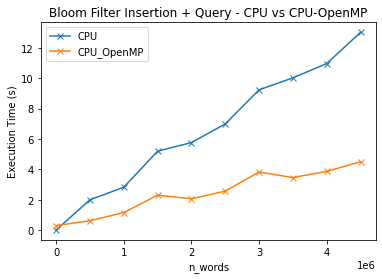

In [29]:
title = f'Bloom Filter Insertion + Query - CPU vs CPU-OpenMP'

plt.title(title)

plt.xlabel("n_words")
plt.ylabel("Execution Time (s)")

plt.plot(x, cpu_time, 'x-', label='CPU')
plt.plot(x, cpu_omp_time, 'x-', label='CPU_OpenMP')

plt.legend()

plt.savefig("graph_cpu_vs_cpuopenmp.png",dpi=1200)

print('Done')